In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---

**Carga del conjunto de datos con outliers**

In [2]:
df_store_sales_outliers = pd.read_csv('../data/raw/store_sales_con_outliers.csv')
df_store_sales_outliers.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,customer_name_normalizado,city_normalizado,product_name_normalizado
0,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,claire gute,henderson,"hon deluxe fabric upholstered stacking chairs,..."
1,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,sean o'donnell,fort lauderdale,bretford cr4500 series slim rectangular table
2,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,brosina hoffman,los angeles,mitel 5320 ip phone voip phone
3,11,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,brosina hoffman,los angeles,chromcraft rectangular conference tables
4,12,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.4240,brosina hoffman,los angeles,konftel 250 conference phone - charcoal black


In [3]:
# Eliminamos columnas inicesarias (repetidas) columnas=[customer_name_normalizado, city_normalizado, product_name_normalizado]
df_store_sales_outliers = df_store_sales_outliers.drop(columns=['customer_name_normalizado','city_normalizado','product_name_normalizado'])
df_store_sales_outliers.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
1,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
2,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520


---

**Carga de conjunto de datos sin outliers(Original)**

In [4]:
df_store_sales = pd.read_csv('../data/raw/train.csv')
df_store_sales.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


----

**Transformación de las columnas `Order Date` y `Ship Date`**

In [5]:
# Transformacioón de Order Date
df_store_sales_outliers['Order Date'] = pd.to_datetime(df_store_sales_outliers['Order Date'], format='%d/%m/%Y')
# df_store_sales_outliers['Order Date'] = df_store_sales_outliers['Order Date'].dt.date

# Tranformación de Ship Date
df_store_sales_outliers['Ship Date'] = pd.to_datetime(df_store_sales_outliers['Ship Date'], format='%d/%m/%Y')
# df_store_sales_outliers['Ship Date'] = df_store_sales_outliers['Ship Date'].dt.date

print(f'''
Tipo de datos de las columnas Order Date y Ship Date
Order Date: {df_store_sales_outliers['Order Date'].dtype}
Ship Date: {df_store_sales_outliers['Ship Date'].dtype}
''')


Tipo de datos de las columnas Order Date y Ship Date
Order Date: datetime64[ns]
Ship Date: datetime64[ns]



In [6]:
df_store_sales_outliers['Order Year'] = df_store_sales_outliers['Order Date'].dt.year
df_store_sales_outliers['Order Month'] = df_store_sales_outliers['Order Date'].dt.month

df_store_sales_outliers.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month
0,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11
1,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10
2,8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,2015,6


---

**Transformación de las columnas `Order Date` y `Ship Date` del conjunto original**

In [7]:
# Transformacioón de Order Date conjunto original
df_store_sales['Order Date'] = pd.to_datetime(df_store_sales['Order Date'], format='%d/%m/%Y')

# Tranformación de Ship Date conjunto original
df_store_sales['Ship Date'] = pd.to_datetime(df_store_sales['Ship Date'], format='%d/%m/%Y')

df_store_sales['Order Year'] = df_store_sales['Order Date'].dt.year
df_store_sales['Order Month'] = df_store_sales['Order Date'].dt.month

df_store_sales.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017,6


----

**Obtención de 4 conjuntos (uno por cada año)**

In [8]:
df_2015_outliers = df_store_sales_outliers[df_store_sales_outliers['Order Year'] == 2015]
df_2016_outliers = df_store_sales_outliers[df_store_sales_outliers['Order Year'] == 2016]
df_2017_outliers = df_store_sales_outliers[df_store_sales_outliers['Order Year'] == 2017]
df_2018_outliers = df_store_sales_outliers[df_store_sales_outliers['Order Year'] == 2018]

**Obtención de 4 conjuntos (uno por cada año) del original**

In [9]:
df_2015_original = df_store_sales[df_store_sales['Order Year'] == 2015]
df_2016_original = df_store_sales[df_store_sales['Order Year'] == 2016]
df_2017_original = df_store_sales[df_store_sales['Order Year'] == 2017]
df_2018_original = df_store_sales[df_store_sales['Order Year'] == 2018]

---

**Análisis de conjunto 2015, 2016, 2017 y 2018 (Gráfico de tiempo) original**

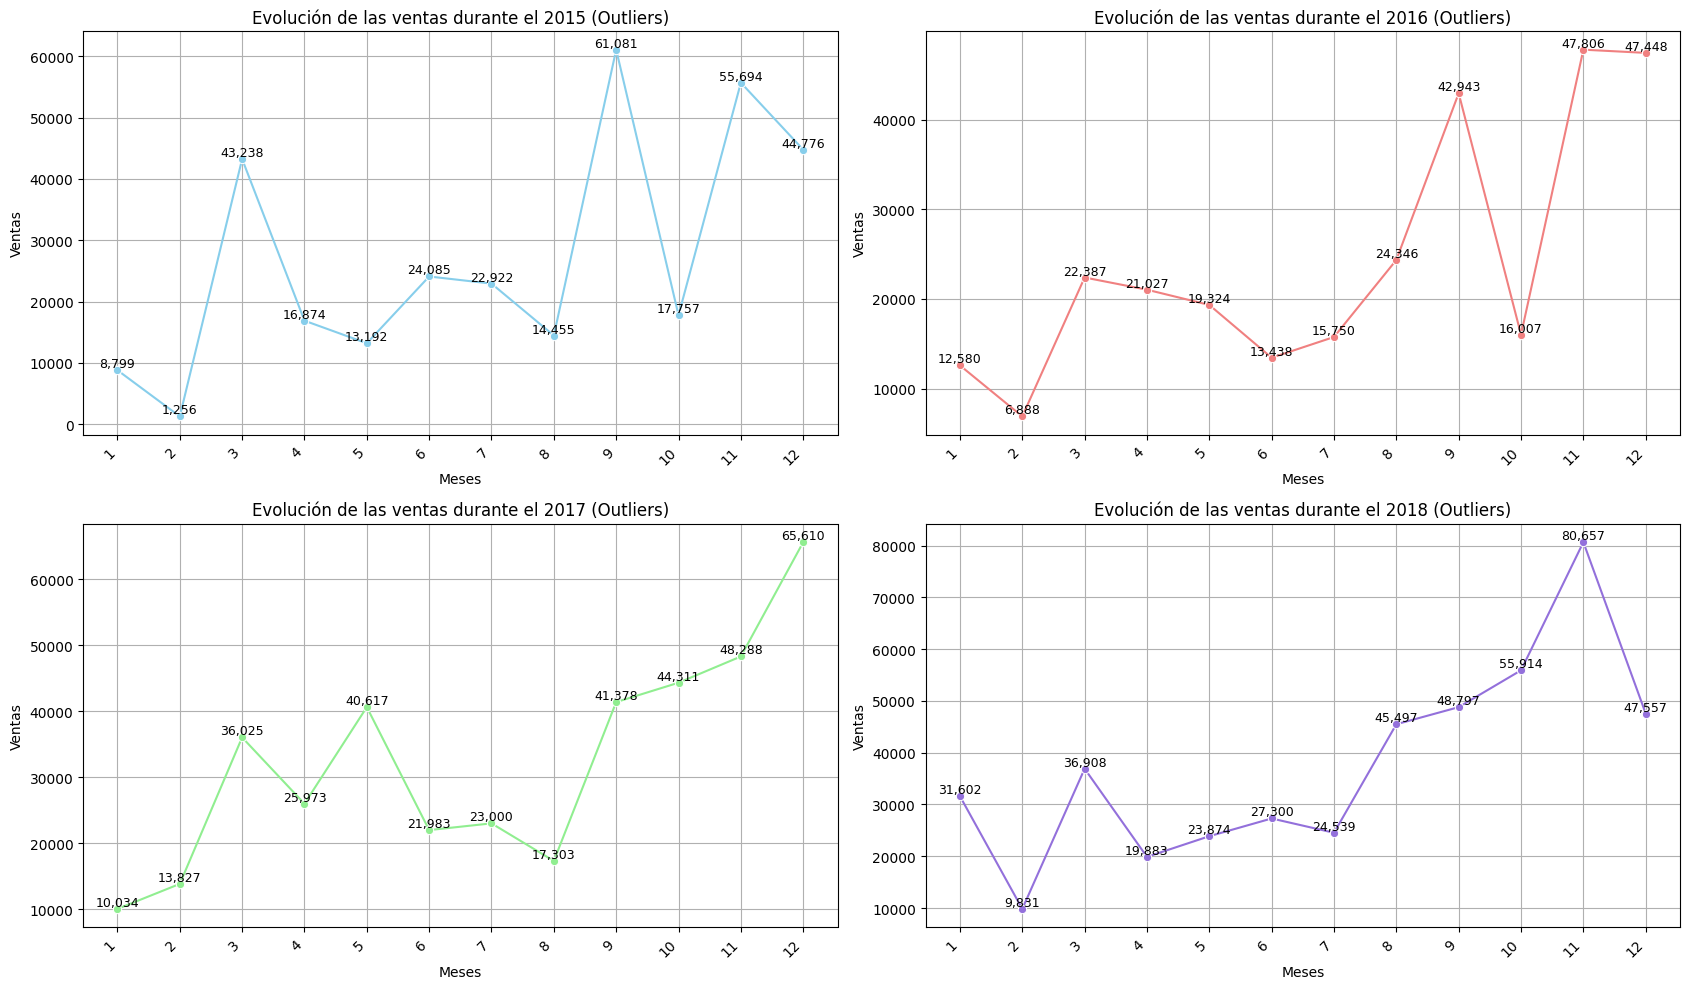

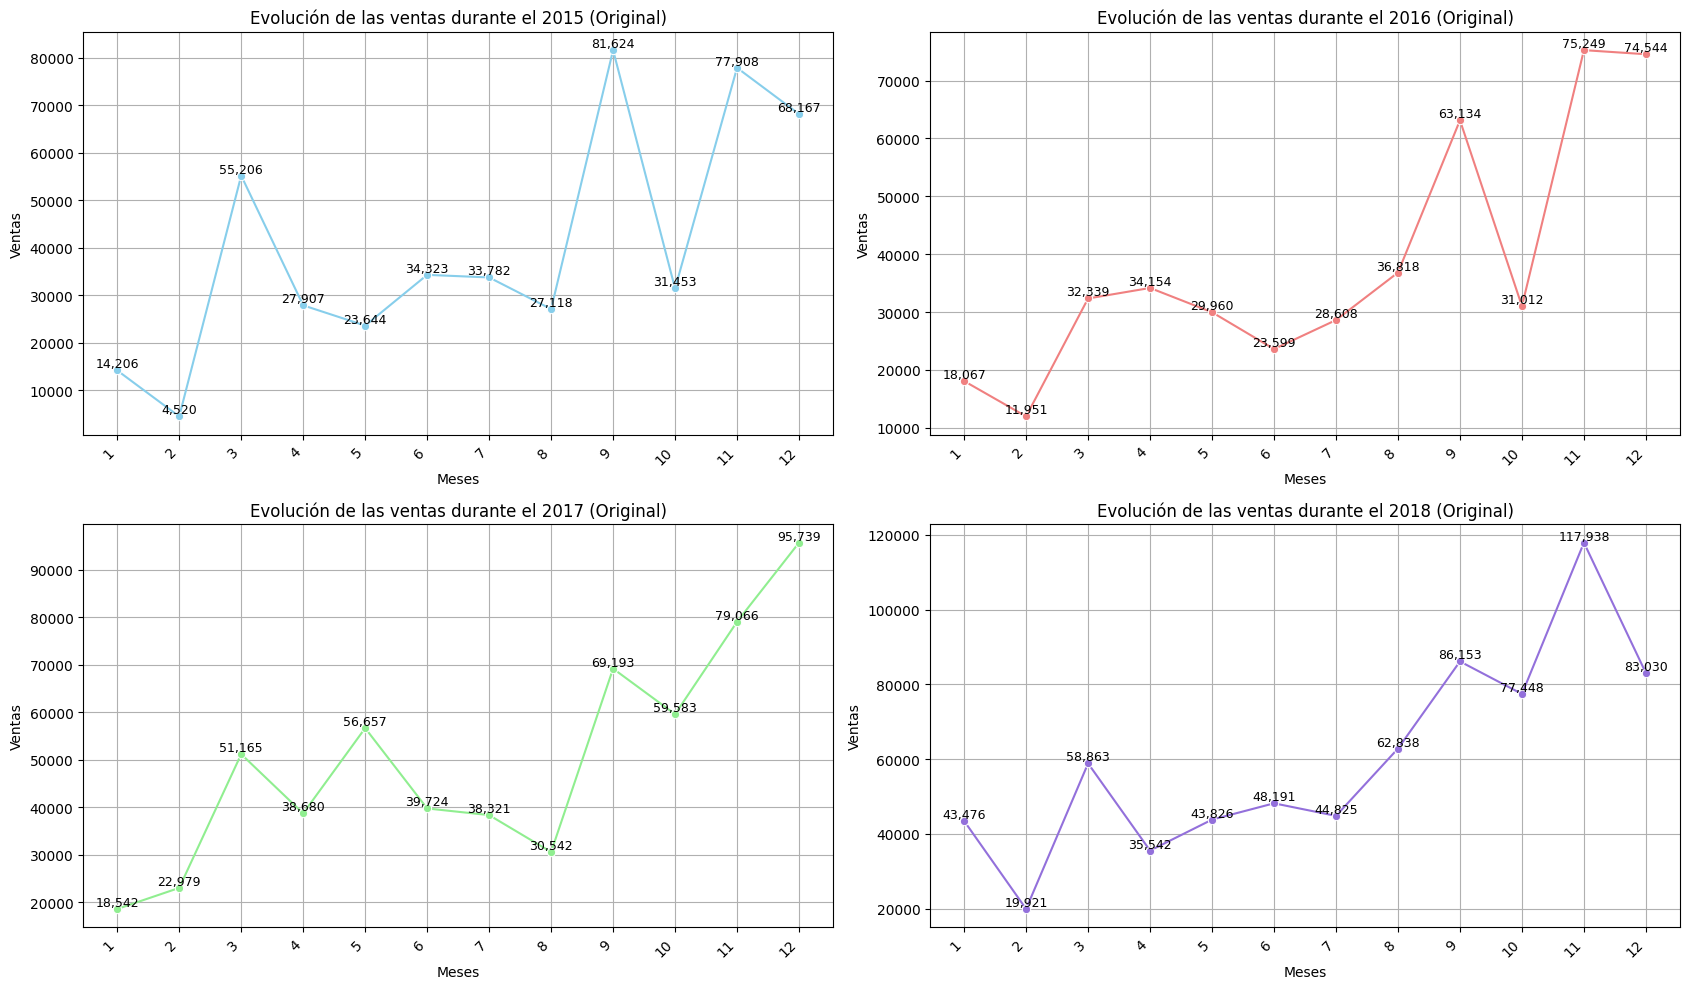

In [10]:
def grafico_lineas(lista_df, lista_colores, lista_annios, con_sin):
    
    fig, axes = plt.subplots(2, 2, figsize=(17, 10))
    axes_flat = axes.flatten()

    for i,datas in enumerate(lista_df):
        td = pd.pivot_table(
        data=datas,
        values='Sales',
        index=['Order Month'],
        aggfunc='sum'
        )

        td = td.reset_index()
        
        ax = axes_flat[i] 

        sns.lineplot(data=td, x='Order Month', y='Sales', ax=ax, marker='o', color=lista_colores[i % len(lista_colores)])
        ax.set_title(f'Evolución de las ventas durante el {lista_annios[i % len(lista_annios)]} ({con_sin})')
        ax.set_xlabel('Meses')
        ax.set_ylabel('Ventas')

        # Agrega los valores a los puntos
        for x, y in zip(td['Order Month'], td['Sales']):
            ax.text(x, y, f'{y:,.0f}', color='black', ha='center', va='bottom', fontsize=9)

        meses = datas['Order Month'].unique()
        ax.set_xticks(meses)
        ax.set_xticklabels(meses, rotation=45, ha='right')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

df_lista = [df_2015_original, df_2016_original, df_2017_original, df_2018_original]
colores = ['skyblue', 'lightcoral', 'lightgreen', 'mediumpurple']
annios = ['2015', '2016', '2017', '2018']

df_lista_outliers = [df_2015_outliers, df_2016_outliers, df_2017_outliers, df_2018_outliers]

grafico_lineas(
    lista_df=df_lista_outliers,
    lista_colores=colores,
    lista_annios=annios,
    con_sin='Outliers'
)

grafico_lineas(
    lista_df=df_lista,
    lista_colores=colores,
    lista_annios=annios,
    con_sin='Original'
)

##### **1. Evolución de las ventas durante el 2015 (Original)**
Las ventas en 2015 muestran una gran fluctuación. Comenzaron bajas en enero, tuvieron un pico significativo en marzo, cayeron drásticamente en abril y mayo, se recuperaron ligeramente en junio, cayeron nuevamente en julio y agosto, y luego experimentaron un gran pico en septiembre. Finalmente, cayeron en octubre y noviembre, para luego subir en diciembre.
- Ventas más bajas: Febrero (4,520) y Agosto (27,118).
- Ventas más altas: Septiembre (81,624) y Diciembre (68,167).

##### **2. Evolución de las ventas durante el 2016 (Original)**
Las ventas en 2016 también muestran fluctuaciones, pero con un patrón diferente al de 2015. Comenzaron en un nivel moderado, tuvieron un valle en febrero, luego una recuperación y un crecimiento gradual hasta agosto, seguido de un pico en octubre y una caída en noviembre, para finalmente subir en diciembre.
- Ventas más bajas: Febrero (11,951).
- Ventas más altas: Octubre (75,249) y Diciembre (74,544).

##### **3. Evolución de las ventas durante el 2017 (Original)**
Las ventas en 2017 muestran una tendencia más ascendente en la segunda mitad del año. Comenzaron bajas, subieron en marzo y abril, cayeron en junio, tuvieron un repunte en julio y agosto, y luego un crecimiento sostenido hasta un pico muy alto en diciembre.
- Ventas más bajas: Febrero (18,542).
- Ventas más altas: Diciembre (95,739).

##### **4. Evolución de las ventas durante el 2018 (Original)**
Las ventas en 2018 presentan fluctuaciones con un pico muy pronunciado hacia el final del año. Comenzaron en un nivel moderado, tuvieron un valle en febrero, se recuperaron en marzo, luego una caída en abril y mayo, un repunte en junio, y un crecimiento muy fuerte en la segunda mitad del año, alcanzando un pico en noviembre y una ligera caída en diciembre.
- Ventas más bajas: Febrero (21,921).
- Ventas más altas: Noviembre (117,938).

> En los 4 gráficos se muestra que el **mes de Febrero es el más bajo (durante los 4 años).**

> Los meses con más ventas son los **meses de Noviembre y Diciembre (durante los 4 años)**

**Exploración Mes de Frebrero (más bajo)**

In [11]:
# Conjunto con Outliers
frebrero_prod_outliers = df_2015_outliers[df_2015_outliers['Order Month'] == 2]
frebrero_prod_outliers

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month
675,5632,CA-2015-127614,2015-02-11,2015-02-15,Standard Class,NF-18385,Natalie Fritzler,Consumer,United States,Chesapeake,Virginia,23320.0,South,FUR-TA-10003715,Furniture,Tables,Hon 2111 Invitation Series Corner Table,1256.22,2015,2


In [12]:
# Conjunto Original
frebrero_prod_original = df_2015_original[(df_2015_original['Order Month'] == 2) & (df_2015_original['Product Name'] == 'Hon 2111 Invitation Series Corner Table')]
frebrero_prod_original

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month
5631,5632,CA-2015-127614,2015-02-11,2015-02-15,Standard Class,NF-18385,Natalie Fritzler,Consumer,United States,Chesapeake,Virginia,23320.0,South,FUR-TA-10003715,Furniture,Tables,Hon 2111 Invitation Series Corner Table,1256.22,2015,2


**Exploración Meses de Noviembre y Diciembre (Meses más altos)**

In [13]:
# Conjunto con Outliers
nov_outliers = df_2015_outliers[df_2015_outliers['Order Month'] == 11]
nov_outliers.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month
5,17,CA-2015-105893,2015-11-11,2015-11-18,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,Wisconsin,53711.0,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.880,2015,11
22,183,CA-2015-158274,2015-11-19,2015-11-24,Second Class,RM-19675,Robert Marley,Home Office,United States,Monroe,Louisiana,71203.0,South,TEC-PH-10003273,Technology,Phones,AT&T TR1909W,503.960,2015,11
40,319,CA-2015-164973,2015-11-04,2015-11-09,Standard Class,NM-18445,Nathan Mautz,Home Office,United States,New York City,New York,10024.0,East,TEC-MA-10002927,Technology,Machines,Canon imageCLASS MF7460 Monochrome Digital Las...,3991.980,2015,11
62,474,CA-2015-144666,2015-11-09,2015-11-11,Second Class,JP-15520,Jeremy Pistek,Consumer,United States,San Francisco,California,94110.0,West,TEC-PH-10002680,Technology,Phones,Samsung Galaxy Note 3,703.968,2015,11
97,807,CA-2015-134313,2015-11-01,2015-11-07,Standard Class,RA-19915,Russell Applegate,Consumer,United States,Denver,Colorado,80219.0,West,TEC-PH-10001795,Technology,Phones,ClearOne CHATAttach 160 - speaker phone,1983.968,2015,11
116,983,CA-2015-163419,2015-11-11,2015-11-14,Second Class,TZ-21580,Tracy Zic,Consumer,United States,Louisville,Colorado,80027.0,West,TEC-PH-10000560,Technology,Phones,Samsung Galaxy S III - 16GB - pebble blue (T-M...,559.984,2015,11
117,984,CA-2015-163419,2015-11-11,2015-11-14,Second Class,TZ-21580,Tracy Zic,Consumer,United States,Louisville,Colorado,80027.0,West,FUR-CH-10000665,Furniture,Chairs,"Global Airflow Leather Mesh Back Chair, Black",603.920,2015,11
188,1571,US-2015-157385,2015-11-23,2015-11-25,First Class,SC-20095,Sanjit Chand,Consumer,United States,Los Angeles,California,90004.0,West,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,603.920,2015,11
200,1637,CA-2015-168984,2015-11-26,2015-12-02,Standard Class,NW-18400,Natalie Webber,Consumer,United States,Tigard,Oregon,97224.0,West,OFF-ST-10001097,Office Supplies,Storage,Office Impressions Heavy Duty Welded Shelving ...,669.080,2015,11
257,2210,CA-2015-125556,2015-11-14,2015-11-16,Second Class,ML-17410,Maris LaWare,Consumer,United States,Fairfield,Connecticut,6824.0,East,TEC-PH-10001079,Technology,Phones,Polycom SoundPoint Pro SE-225 Corded phone,832.930,2015,11


In [14]:
# Conjunto Original
nov_original = df_2015_original[df_2015_original['Order Month'] == 12]
nov_original

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month
67,68,CA-2015-106376,2015-12-05,2015-12-10,Standard Class,BS-11590,Brendan Sweed,Corporate,United States,Gilbert,Arizona,85234.0,West,OFF-AR-10002671,Office Supplies,Art,Hunt BOSTON Model 1606 High-Volume Electric Pe...,1113.024,2015,12
68,69,CA-2015-106376,2015-12-05,2015-12-10,Standard Class,BS-11590,Brendan Sweed,Corporate,United States,Gilbert,Arizona,85234.0,West,TEC-PH-10002726,Technology,Phones,netTALK DUO VoIP Telephone Service,167.968,2015,12
124,125,US-2015-152030,2015-12-26,2015-12-28,Second Class,AD-10180,Alan Dominguez,Home Office,United States,Houston,Texas,77041.0,Central,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,600.558,2015,12
180,181,CA-2015-166191,2015-12-05,2015-12-09,Second Class,DK-13150,David Kendrick,Corporate,United States,Decatur,Illinois,62521.0,Central,OFF-ST-10003455,Office Supplies,Storage,"Tenex File Box, Personal Filing Tote with Lid,...",24.816,2015,12
181,182,CA-2015-166191,2015-12-05,2015-12-09,Second Class,DK-13150,David Kendrick,Corporate,United States,Decatur,Illinois,62521.0,Central,TEC-AC-10004659,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,408.744,2015,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511,9512,CA-2015-130575,2015-12-14,2015-12-16,First Class,CS-11845,Cari Sayre,Corporate,United States,Chicago,Illinois,60623.0,Central,OFF-BI-10002353,Office Supplies,Binders,GBC VeloBind Cover Sets,9.264,2015,12
9521,9522,CA-2015-169446,2015-12-19,2015-12-25,Standard Class,SG-20605,Speros Goranitis,Consumer,United States,Chicago,Illinois,60623.0,Central,TEC-PH-10002817,Technology,Phones,RCA ViSYS 25425RE1 Corded phone,323.976,2015,12
9522,9523,CA-2015-169446,2015-12-19,2015-12-25,Standard Class,SG-20605,Speros Goranitis,Consumer,United States,Chicago,Illinois,60623.0,Central,OFF-PA-10000295,Office Supplies,Paper,Xerox 229,15.552,2015,12
9523,9524,CA-2015-169446,2015-12-19,2015-12-25,Standard Class,SG-20605,Speros Goranitis,Consumer,United States,Chicago,Illinois,60623.0,Central,OFF-ST-10000419,Office Supplies,Storage,"Rogers Jumbo File, Granite",32.592,2015,12


**Evolución del precio por producto a los largo de 2015, 2016, 2017 y 2018 (Meses)**

In [96]:
# Función para obtener la evolución del precio por producto
def evolucion_precio_producto(data_frame_x, lista_annios, nom_producto):

    # Lista de data frame para recorrer
    for a, data in enumerate(data_frame_x):

        # Obtener los meses por el año en cuestion 
        meses_annio_x = data['Order Month'].unique()
        meses_annio_x.sort()

        # Lista para almacenar los DataFrames procesados de cada mes para este año
        resultados_mensuales = [] 

        for i in meses_annio_x:

            # Extraer el mes en orden
            mes_x = data[data['Order Month'] == i]
            
            if not mes_x.empty: # Solo procesar si hay datos para el mes
                # Agrupar precio del producto por mes(crear lista)
                df_agrupado = mes_x.groupby(['Product Name', 'Order Month'])['Sales'].apply(list).reset_index()

                # Renombrar la columna 'Sales' a algo más descriptivo temporalmente
                df_agrupado = df_agrupado.rename(columns={'Sales': 'Sales_Lista_Temporal'})

                # Crear la columna Sales en formato String
                df_agrupado['Sales en el mes'] = df_agrupado['Sales_Lista_Temporal'].apply(lambda x: ', '.join(map(str, x)))

                # Calcular el "Sales Promedio Mensual"
                df_agrupado['Sales Promedio Mensual'] = df_agrupado['Sales_Lista_Temporal'].apply(lambda x: np.mean(x))

                # Eliminar la columna auxiliar 'Sales_Lista_Temporal'
                df_preliminar = df_agrupado.drop(columns=['Sales_Lista_Temporal'])

                # print(f'Datas Frames del {lista_annios[a % len(lista_annios)]}')

                # Filtrado
                df_filtrado_producto = df_preliminar[df_preliminar['Product Name'] == nom_producto]

                # print(df_final)
                if not df_filtrado_producto.empty:
                    resultados_mensuales.append(df_filtrado_producto)

        # Si hay resultados para este año y producto, concatenarlos
        if resultados_mensuales:
            df_final_anual = pd.concat(resultados_mensuales, ignore_index=True)
            print(f'\nDatos para el producto "{nom_producto}" en el año {lista_annios[a]}:')
            print(df_final_anual)
        else:
            print(f'\nNo se encontraron datos para el producto "{nom_producto}" en el año {lista_annios[a]}')


In [97]:
# Explorar el conjunto de datos con Outliers y tomar varios nombres de productos
def obtener_nombre_producto_aleatorio():
    nombre_productos = df_store_sales_outliers['Product Name'].value_counts()
    datos_aleatorios = nombre_productos.sample(n=1)
    nombre_producto_aleatorio = datos_aleatorios.index[0]

    return nombre_producto_aleatorio

In [98]:
nombre_producto = obtener_nombre_producto_aleatorio()
evolucion_precio_producto(df_lista, lista_annios=annios, nom_producto=nombre_producto)


Datos para el producto "Geemarc AmpliPOWER60" en el año 2015:
           Product Name  Order Month Sales en el mes  Sales Promedio Mensual
0  Geemarc AmpliPOWER60            5           464.0                  464.00
1  Geemarc AmpliPOWER60           11          148.48                  148.48

Datos para el producto "Geemarc AmpliPOWER60" en el año 2016:
           Product Name  Order Month Sales en el mes  Sales Promedio Mensual
0  Geemarc AmpliPOWER60            7   148.48, 74.24                  111.36
1  Geemarc AmpliPOWER60           12          668.16                  668.16

Datos para el producto "Geemarc AmpliPOWER60" en el año 2017:
           Product Name  Order Month Sales en el mes  Sales Promedio Mensual
0  Geemarc AmpliPOWER60            9   278.4, 519.68                  399.04

Datos para el producto "Geemarc AmpliPOWER60" en el año 2018:
           Product Name  Order Month Sales en el mes  Sales Promedio Mensual
0  Geemarc AmpliPOWER60            2           371.2   

----

**Cantidad de registros a revisar (Muestra)**